In [1]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

### Load Data

In [2]:
folder_FUS_FL = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FL_PAINT/pooled_better_best"
os.chdir(folder_FUS_FL)

lst_fname_FUS_PAINT = [f for f in os.listdir(".") if f.endswith("-left-PAINT.tif")]
lst_fname_FL_PAINT = [f[:-14] + "right-PAINT.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FUS_step = [f[:-14] + "left-stepsize.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FL_step = [f[:-14] + "right-stepsize.tif" for f in lst_fname_FUS_PAINT]

lst_FUS_PAINT = [imread(f) for f in lst_fname_FUS_PAINT]
lst_FL_PAINT = [imread(f) for f in lst_fname_FL_PAINT]
lst_FUS_step = [imread(f) for f in lst_fname_FUS_step]
lst_FL_step = [imread(f) for f in lst_fname_FL_step]

In [3]:
fontsize = 18

### Functions

In [4]:
def weighted_Pearson(img1_flatten, img2_flatten, weights):
    # calculate mean for images and weights
    mean_img1 = np.sum(img1_flatten * weights) / np.sum(weights)
    mean_img2 = np.sum(img2_flatten * weights) / np.sum(weights)
    mean_weights = np.mean(weights)

    # calculate weighted covariance and variances
    cov = np.sum(
        weights * (img1_flatten - mean_img1) * (img2_flatten - mean_img2)
    ) / np.sum(weights)
    var_img1 = np.sum(weights * (img1_flatten - mean_img1) ** 2) / np.sum(weights)
    var_img2 = np.sum(weights * (img2_flatten - mean_img2) ** 2) / np.sum(weights)

    # calculate weighted correlation
    weighted_corr = cov / np.sqrt(var_img1 * var_img2)

    return weighted_corr

### FUS PAINT - FL PAINT

-0.2618780026180299 0.01618647373234265


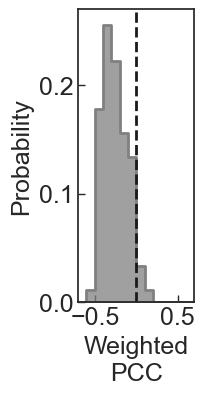

In [5]:
pcc_abs_max = 0.7
weighted_corr_FlocRloc = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2 + img2_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocRloc.append(weighted_corr)

plt.figure(figsize=(1.5, 3.8))
df = pd.DataFrame({"value": weighted_corr_FlocRloc}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xticks([-0.5, 0.5])
plt.ylim(0, 0.27)
plt.yticks([0, 0.1, 0.2])
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight"
)
print(np.mean(weighted_corr_FlocRloc), sem(weighted_corr_FlocRloc))

### FUS step - FL step

0.4183781481577969 0.01778593732015395


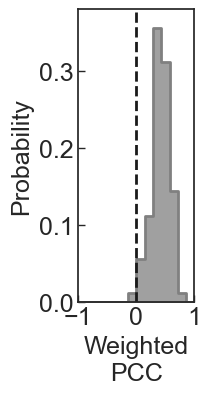

In [9]:
pcc_abs_max = 1
weighted_corr_FstepRstep = []
for img1, img2, w1, w2 in zip(lst_FUS_step, lst_FL_step, lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = w1.flatten() ** 2 + w2.flatten() ** 2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FstepRstep.append(weighted_corr)

plt.figure(figsize=(1.5, 3.8))
df = pd.DataFrame({"value": weighted_corr_FstepRstep}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xticks([-1, 0, 1])
plt.ylim(0, 0.38)
plt.yticks([0, 0.1, 0.2, 0.3])
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FstepRstep.png", format="png", dpi=300, bbox_inches="tight"
)
print(np.mean(weighted_corr_FstepRstep), sem(weighted_corr_FstepRstep))

### FUS PAINT-stepsize

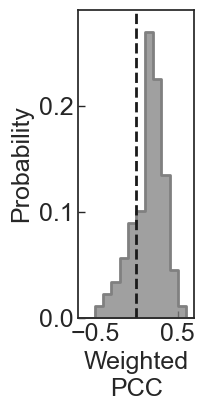

In [7]:
pcc_abs_max = 0.7
weighted_corr_FlocFstep = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FUS_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocFstep.append(weighted_corr)

plt.figure(figsize=(1.5, 4))
df = pd.DataFrame({"value": weighted_corr_FlocFstep}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xticks([-0.5, 0.5])
plt.ylim(0, 0.29)
plt.yticks([0, 0.1, 0.2])
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FlocFstep.png", format="png", dpi=300, bbox_inches="tight"
)

### FL PAINT-stepsize

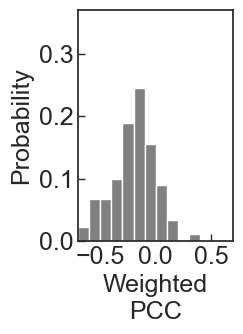

In [8]:
weighted_corr_RlocRstep = []
for img1, img2 in zip(lst_FL_PAINT, lst_FL_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_RlocRstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_RlocRstep,
    bins=14,
    range=(-pcc_abs_max, pcc_abs_max),
    color="gray",
    weights=np.ones_like(weighted_corr_RlocRstep) / len(weighted_corr_RlocRstep),
)
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.ylim(0, 0.37)
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_RlocRstep.png", format="png", dpi=300, bbox_inches="tight"
)